# Visualization

http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [3]:
import seaborn as sns

# 载入数据集
iris = sns.load_dataset("iris")

## 基本绘图

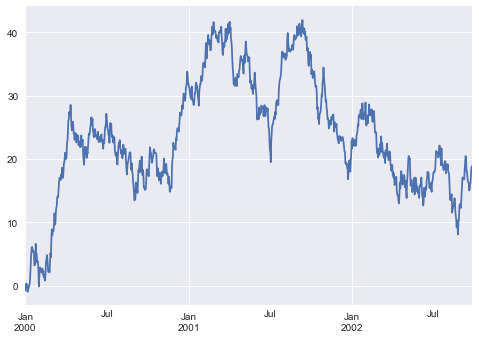

In [4]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

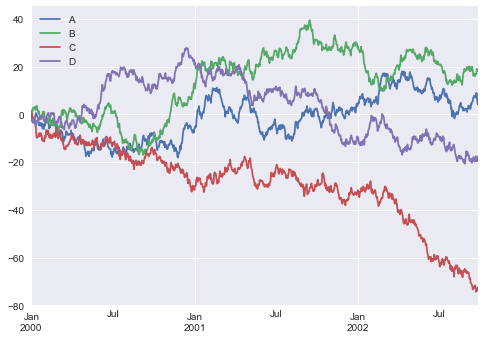

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

## 其它图形

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or 'density' for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

### 线条图 Bar

对于标签化、非时间序列数据，使用线条图表示。

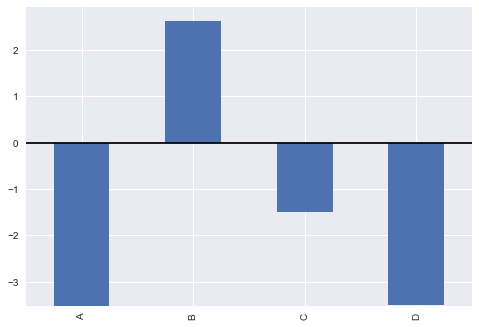

In [6]:
df.ix[5].plot.bar()
plt.axhline(0, color='k')

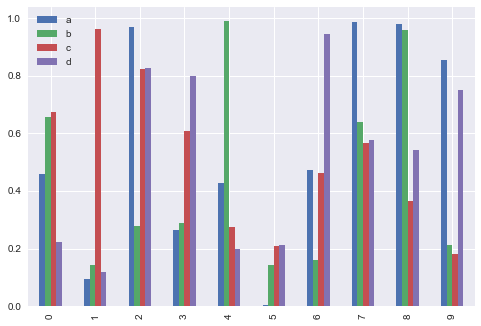

In [7]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

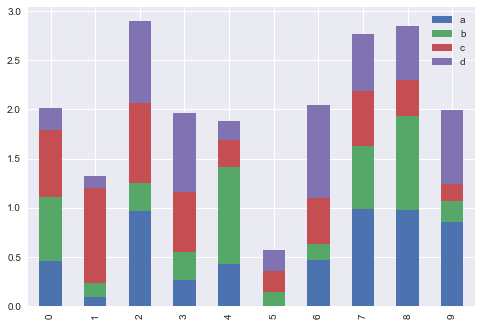

In [8]:
# 堆叠线条图
df2.plot.bar(stacked=True);

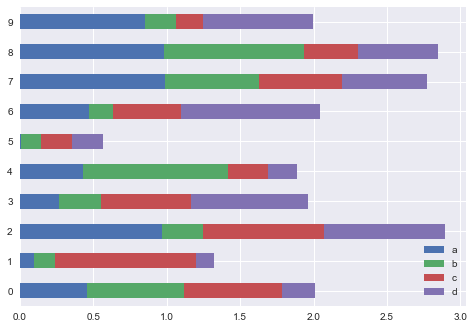

In [9]:
# 水平堆叠线条图
df2.plot.barh(stacked=True);

### 柱状图 Histograms

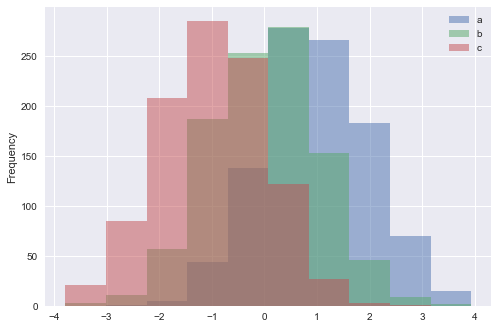

In [10]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.plot.hist(alpha=0.5)

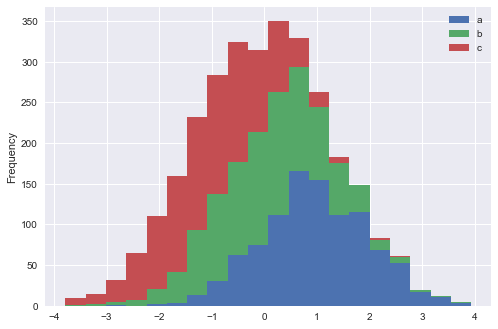

In [11]:
df4.plot.hist(stacked=True, bins=20)

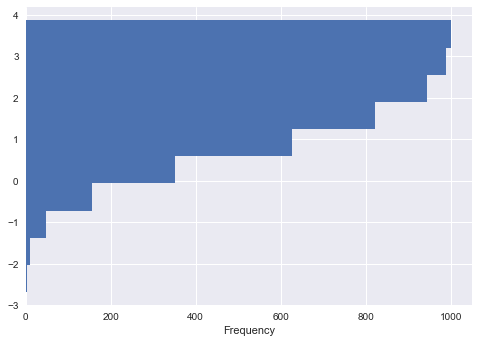

In [12]:
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

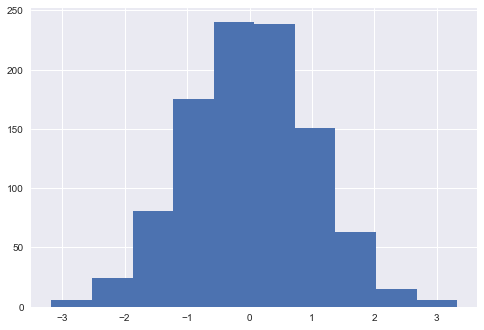

In [13]:
# diff: 一阶差分（时间序列很有用）
df['A'].diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117859d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1163f0a50>]], dtype=object)

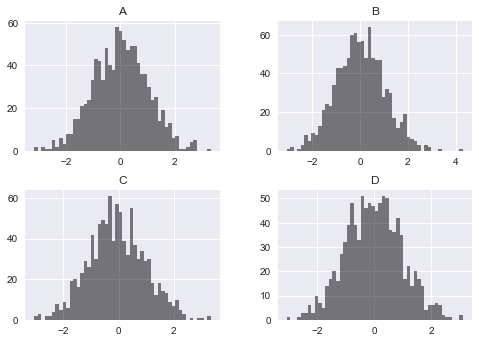

In [14]:
df.diff().hist(color='k', alpha=0.5, bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116ec81d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1181ab090>]], dtype=object)

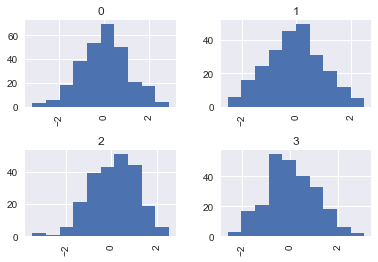

In [15]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000), figsize=(6, 4))

### 箱型图 Box Plot

使用 `Series.plot.box()`、`DataFrame.plot.box()`、`DataFrame.boxplot()`在每个 column 表现个别数据分布情形。


[箱线图](http://wiki.mbalib.com/wiki/%E7%AE%B1%E7%BA%BF%E5%9B%BE)（Boxplot）也称箱须图（Box-whisker Plot），是利用数据中的五个统计量：最小值、第一四分位数、中位数、第三四分位数与最大值来描述数据的一种方法，它也可以粗略地看出数据是否具有有对称性，分布的分散程度等信息，特别可以用于对几个样本的比较。

绘制步骤:
1. 画数轴
2. 画矩形盒 两端边的位置分别对应数据的上下四分位数矩形盒：端边的位置分别对应数据的上下四分位数（Q1和Q3）。在矩形盒内部中位数位置画一条线段为中位线。
3. 在Q3＋1.5IQR（四分位距）和Q1-1.5IQR处画两条与中位线一样的线段，这两条线段为异常值截断点，称其为**内限**；在Q3＋3IQR和Q1－3IQR处画两条线段，称其为**外限**。处于内限以外位置的点表示的数据都是异常值，其中在内限与外限之间的异常值为温和的异常值（mild outliers），在外限以外的为极端的异常值(li)的异常值extreme outliers。
4. 从矩形盒两端边向外各画一条线段直到不是异常值的最远点 表示该批数据正常值的分布区间点，示该批数据正常值的分布区间。
5. 用“〇”标出温和的异常值，用“＊”标出极端的异常值。

> 四分位差又称内距、也称四分间距(IQR, inter-quartile range)，是指将各个变量值按大小顺序排列，然后将此数列分成四等份，所得第三个四分位上的值与第一个四分位上的值的差。

![](http://wiki.mbalib.com/w/images/9/97/%E7%AE%B1%E7%BA%BF%E5%9B%BE%E5%9B%BE%E7%A4%BA.jpg)

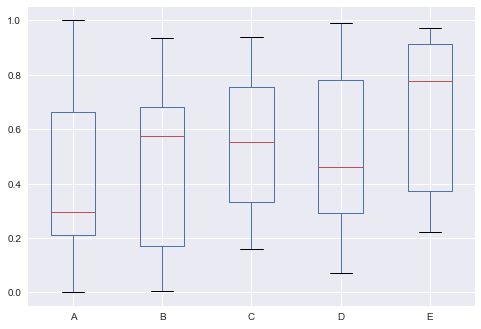

In [16]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()

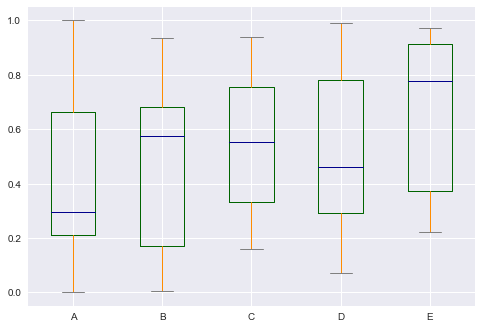

In [17]:
# 自定义颜色
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+')

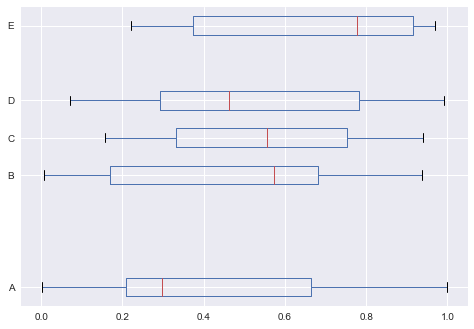

In [18]:
# 自定义方向（垂直、水平）、位置
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

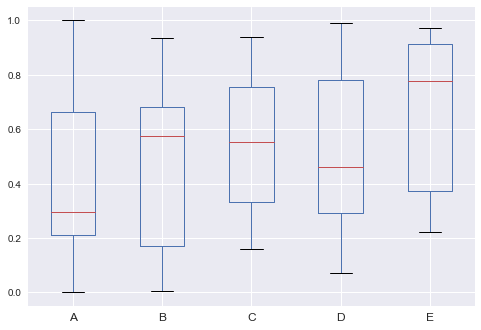

In [19]:
# 使用 DataFrame.boxplot
df.boxplot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118d58110>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118e6bb50>], dtype=object)

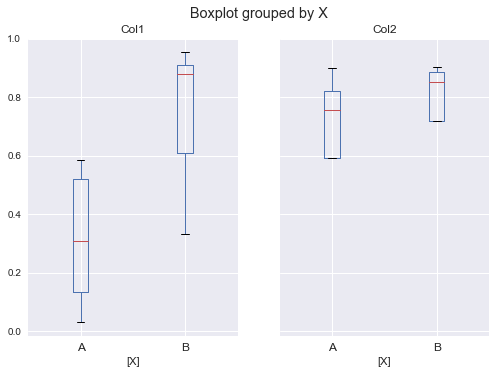

In [20]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

# 使用 by 参数将数据进行分组
df.boxplot(by='X')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118d4a710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11923a790>], dtype=object)

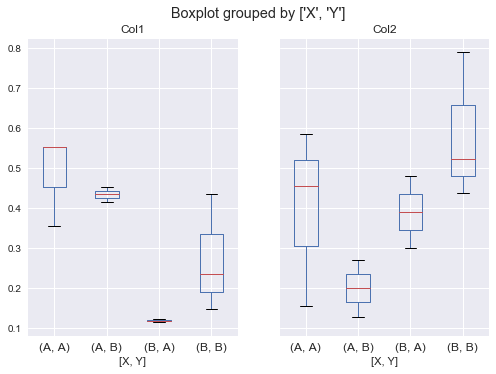

In [21]:
df = pd.DataFrame(np.random.rand(10,3), columns=['Col1', 'Col2', 'Col3'])
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

# 选取 columns 子集，并对多个 column 分类
df.boxplot(column=['Col1','Col2'], by=['X','Y'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11913ba90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1194e45d0>], dtype=object)

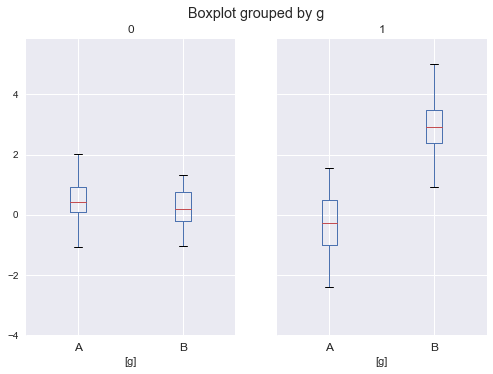

In [22]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)

# 很有趣的布林索引用法
df_box.ix[df_box['g'] == 'B', 1] += 3

df_box.boxplot(by='g')

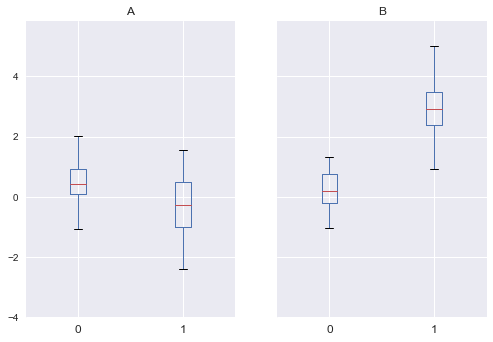

In [23]:
_ = df_box.groupby('g').boxplot()

### 范围图 Area Plot

- 使用 `Series.plot.area()` 与 `DataFrame.plot.area()` 绘画
- 所有面积预设以堆叠方式呈现

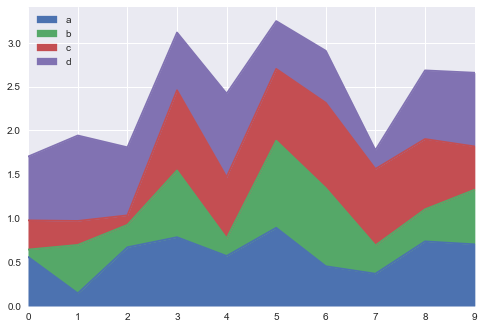

In [24]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

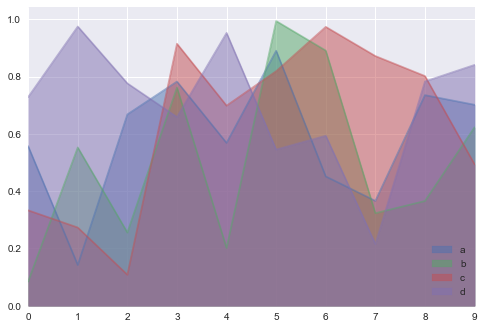

In [25]:
# 面积不堆叠
df.plot.area(stacked=False)

### 散点图 Scatter Plot

- 使用 DataFrame.plot.scatter() 绘画
- 需要 x, y 轴都是数值

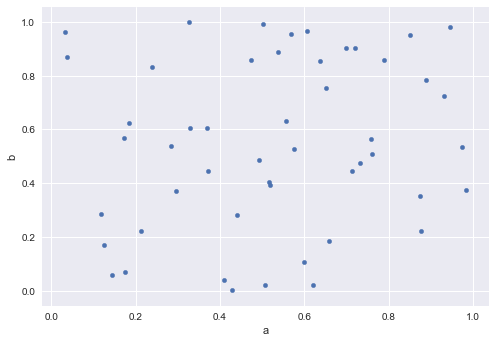

In [26]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b')

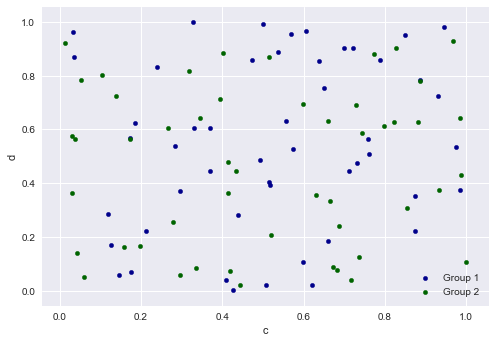

In [27]:
# 呈现多组
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

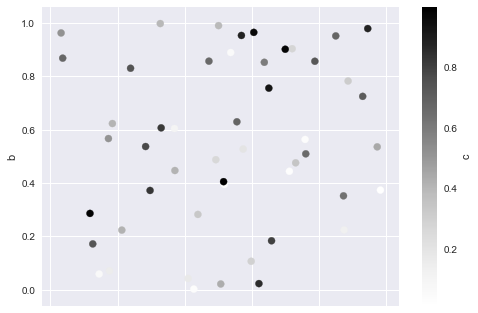

In [28]:
# The keyword c may be given as the name of a column to provide colors for each point:
# 用颜色表示另一维度的信息
df.plot.scatter(x='a', y='b', c='c', s=50);

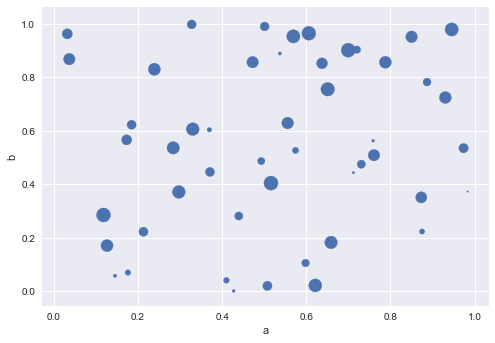

In [29]:
# 用 s(size) 表现另一维度的数量、强度
df.plot.scatter(x='a', y='b', s=df['c']*200);

### 六角箱型图 Hexagonal Bin Plot

- 使用 `DataFrame.plot.hexbin()` 绘画
- 如果散点图上的点太密集不容易区别个体，可用六角箱型图替代

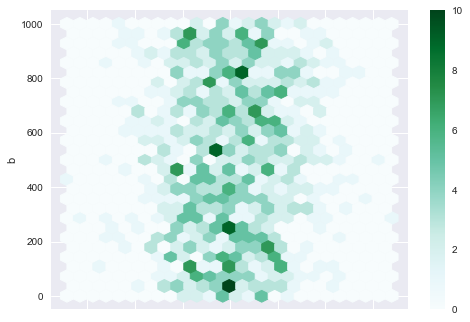

In [30]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)

# gridsize 控制x方向六角形的数量，预设100。数值越大，箱子越小。
df.plot.hexbin(x='a', y='b', gridsize=25)

### 饼图 Pie plot

- 使用 `DataFrame.plot.pie()`或`Series.plot.pie()`绘画
- 如果数据出现NaN，自动填零
- 如果出现负数，会引起错误

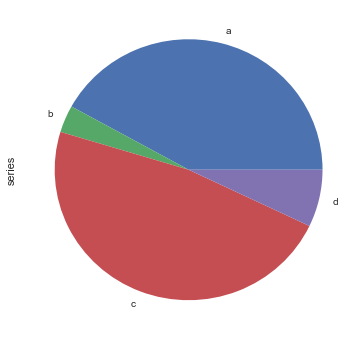

In [31]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b0c5e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b319650>], dtype=object)

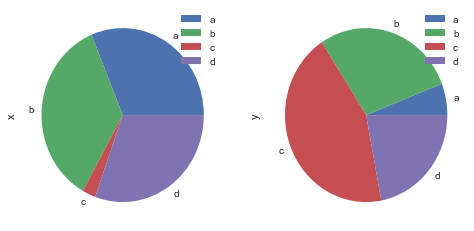

In [32]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

# 使用 subplot 画出子图
df.plot.pie(subplots=True, figsize=(8, 4))

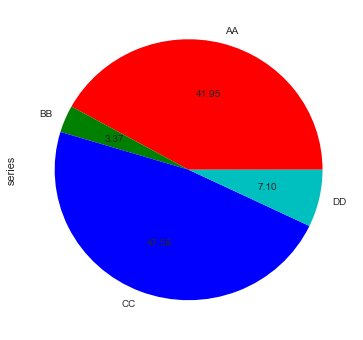

In [33]:
# 使用 labels, colors 重新定义标签与颜色
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=10, figsize=(6, 6))

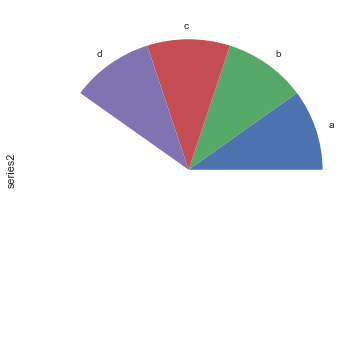

In [34]:
# 如果综合小于1.0，则画出扇形
series = pd.Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
series.plot.pie(figsize=(6, 6))

## 遗失数据处理

图形 | 处理NaN方式
---|---
Line | 留白
Line (stacked) | 填0
Bar | 填0
Scatter | 丢弃
Histogram | 丢弃 (column-wise)
Box | 丢弃 (column-wise)
Area | 填0
KDE | 丢弃 (column-wise)
Hexbin | 丢弃
Pie | 填0

## 绘图工具

### 散点矩阵图 Scatter Matrix Plot

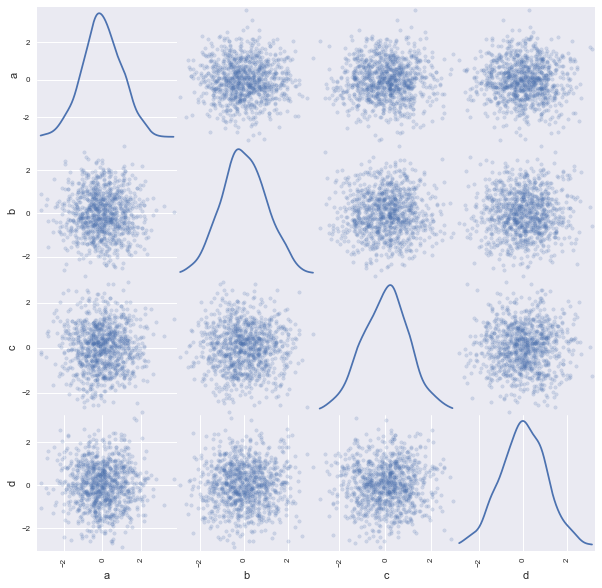

In [35]:
from pandas.tools.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
_ = scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')

### 密度图 Density Plot
- 使用 `Series.plot.kde()` 与 `DataFrame.plot.kde()` 画出核密度图

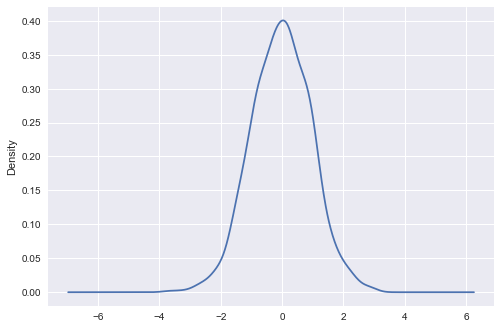

In [36]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

### 调和曲线图 Andrews Curves

- 调和曲线图根据三角变换方法将 p 维空间的点映射到二维平面上的曲线上。
- 更多解释在[调和曲线图和轮廓图的比较](https://cos.name/2009/03/parallel-coordinates-and-andrews-curve/)

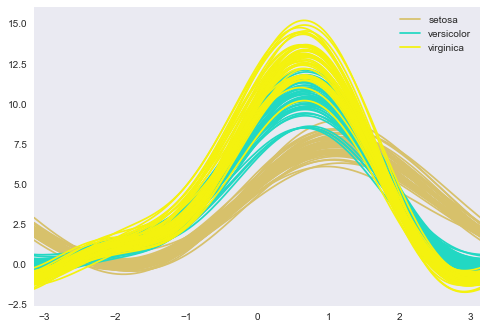

In [37]:
from pandas.tools.plotting import andrews_curves

_ = andrews_curves(iris, 'species')

# 轮廓图 Parallel Coordinates

- 描绘多变量数据的技术。让人根据看到的数据集群评估统计特性。

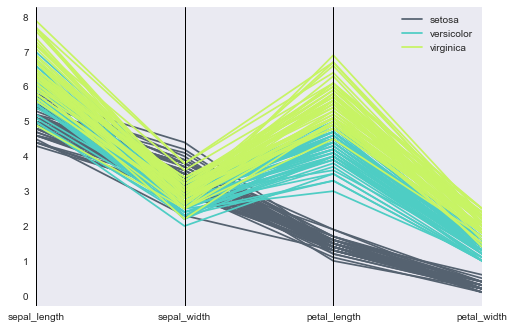

In [38]:
from pandas.tools.plotting import parallel_coordinates

_ = parallel_coordinates(iris, 'species', color=('#556270', '#4ECDC4', '#C7F464'))

In [39]:
parallel_coordinates?

### Lag Plot

- 用来检查数据集在时间（顺序）上是否随机
- 随机数据没有形状
- 非随机结构暗示数据非随机性

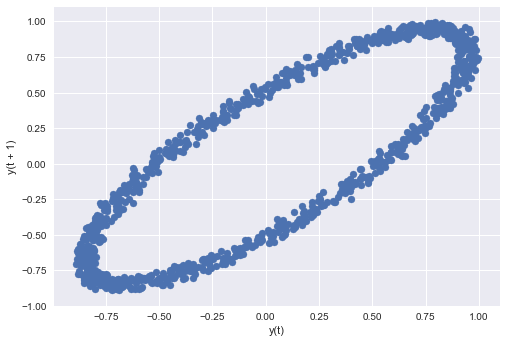

In [40]:
from pandas.tools.plotting import lag_plot

data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data)

### 自相关图 Autocorrelation Plot

- 通常用来检查数据在时间上的随机性。
- 根据时间延迟变化计算自相关。
- 如果时间序列是随机的，自相关应该趋近于零
- 如果时间序列不是随机的，一个或更多的自相关就不会是零
- 图中水平线显示 95% 与 99% 信心区间，虚线为 99% 信心区间

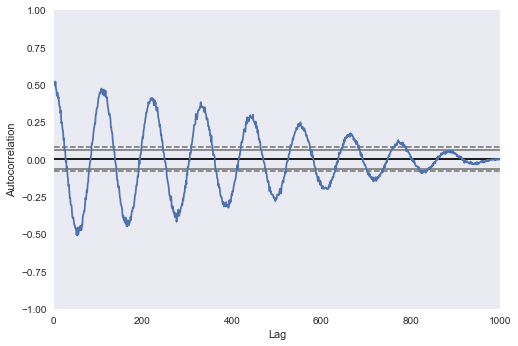

In [41]:
from pandas.tools.plotting import autocorrelation_plot

data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

### Bootstrap Plot

- 用来估算统计上的不确定性，如 mean, median, midrange
- 随机取样特定大小的子集，计算统计特性。重复数次
- 画出 plot 与 histogram 结果构成 bootstrap plot

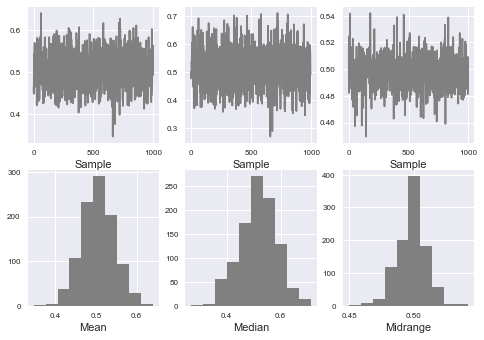

In [42]:
from pandas.tools.plotting import bootstrap_plot

data = pd.Series(np.random.rand(1000))
_ = bootstrap_plot(data, size=50, samples=1000, color='grey')

### RadViz

- 一种将多变量数据视觉化的方法
- 根据简单 spring tension minimization 算法...

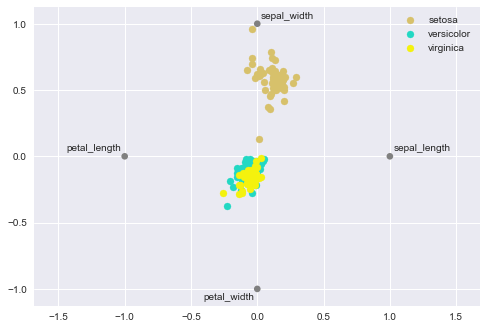

In [43]:
from pandas.tools.plotting import radviz

_ = radviz(iris, 'species')

## 绘图格式 Plot Formatting
大部分绘图都有一些 keyword 参数，用来控制图片布局与格式

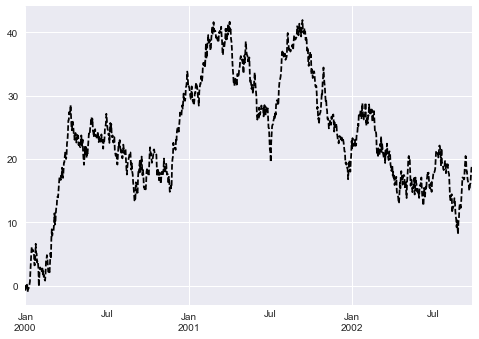

In [44]:
ts.plot(style='k--', label='Series')

### 图例

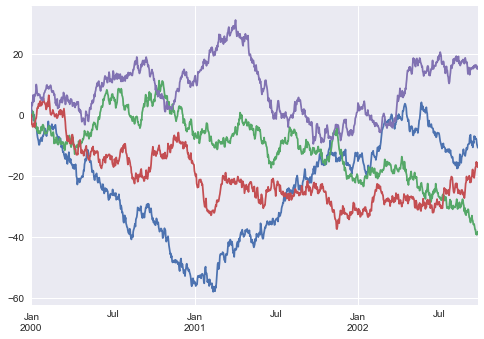

In [45]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

# 通过 legned 控制图例是否出现
df.plot(legend=False)

### 比例尺
- logy, logx, loglog 控制 x,y 轴是否以 log 表示

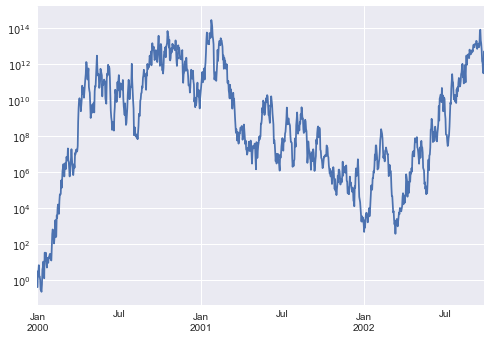

In [46]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = np.exp(ts.cumsum())

# 控制Y轴是否为log-scale
ts.plot(logy=True)

### 使用第二个 Y 轴

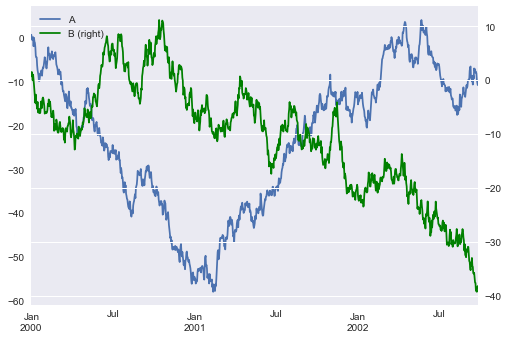

In [47]:
df.A.plot(legend=True)
df.B.plot(secondary_y=True, style='g', legend=True)

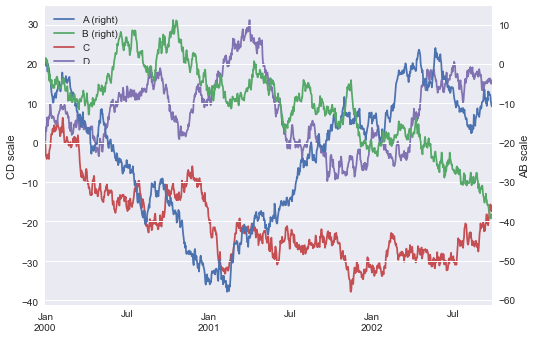

In [48]:
plt.figure()

# 指定那些 column 放在右边
ax = df.plot(secondary_y=['A', 'B'])

# 设定左Y轴标签
ax.set_ylabel('CD scale')

# 设定右Y轴标签
ax.right_ax.set_ylabel('AB scale')

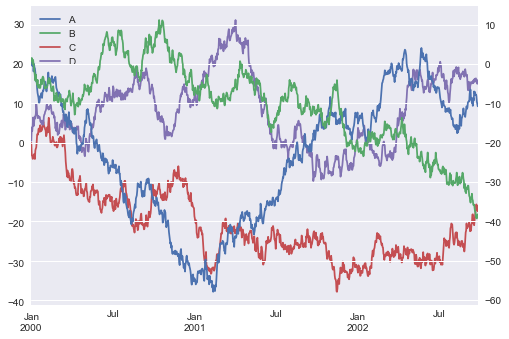

In [49]:
# 移除 (right) 标识
df.plot(secondary_y=['A', 'B'], mark_right=False)

### 抑制 tick 分辨率调整

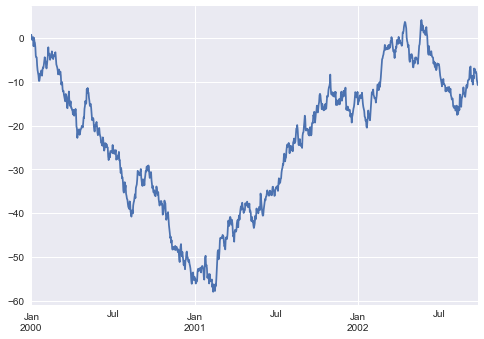

In [50]:
df.A.plot()

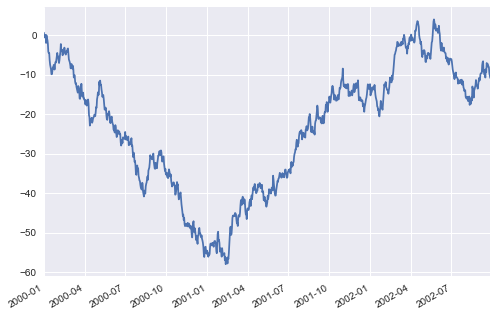

In [51]:
df.A.plot(x_compat=True)

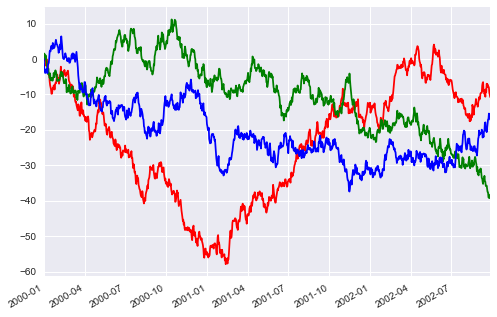

In [52]:
# 在多张图使用 compat=True
with pd.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

### 子图

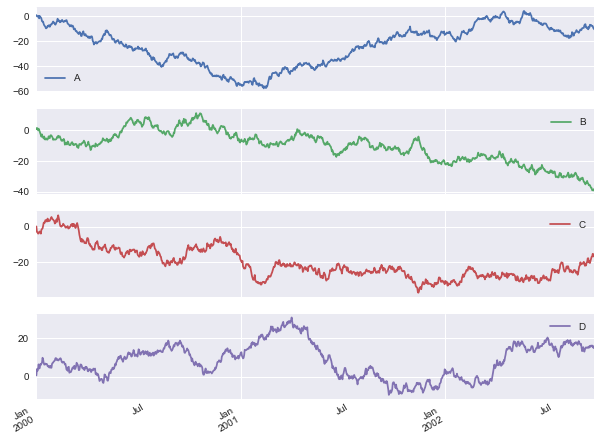

In [53]:
_ = df.plot(subplots=True, figsize=(10, 8))

### 使用布局

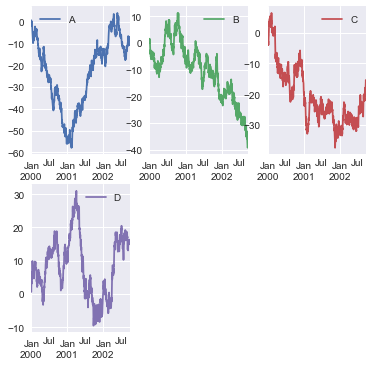

In [54]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False);

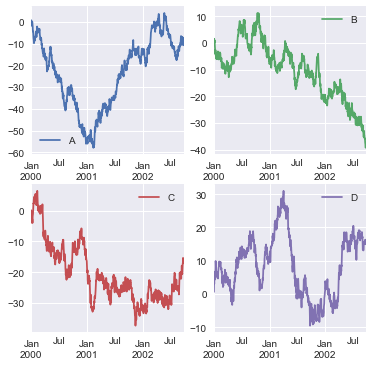

In [55]:
# 使用 -1 自动推测 row, column 数目
_ = df.plot(subplots=True, layout=(2, -1), figsize=(6, 6), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12142f250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1205906d0>], dtype=object)

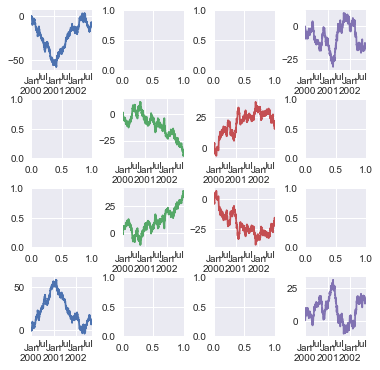

In [56]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6));

# 调整子图间空间
plt.subplots_adjust(wspace=0.5, hspace=0.5);

# 将子图布局放到列表
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]

df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False)
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False) # 将数据数值反向(*-1)

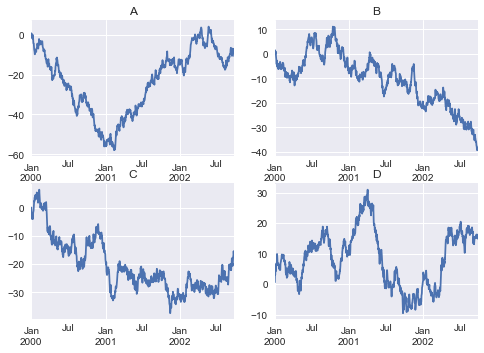

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# 直接传递 ax 给 Series.plot()
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D');

### 误差线

- `DataFrame.plot()`  与 `Series.plot()` 支援画出误差线（error bar）
- 水平方向误差线使用 xerr
- 垂直方向误差线使用 yerr

In [58]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                                 ['foo', 'foo', 'bar', 'bar', 'foo', 'foo', 'bar', 'bar']], names=['letter', 'word'])
df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2], 'data2': [6, 5, 7, 5, 4, 5, 6, 5]}, index=ix3)
print df3

# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=('letter', 'word'))
means = gp3.mean()
print means
errors = gp3.std()
print errors

             data1  data2
letter word              
a      foo       3      6
       foo       2      5
       bar       4      7
       bar       3      5
b      foo       2      4
       foo       4      5
       bar       3      6
       bar       2      5
             data1  data2
letter word              
a      bar     3.5    6.0
       foo     2.5    5.5
b      bar     2.5    5.5
       foo     3.0    4.5
                data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   0.707107  0.707107
b      bar   0.707107  0.707107
       foo   1.414214  0.707107


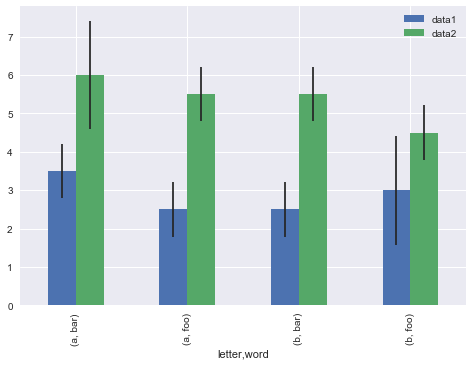

In [59]:
# Plot
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax)

### 画出表格

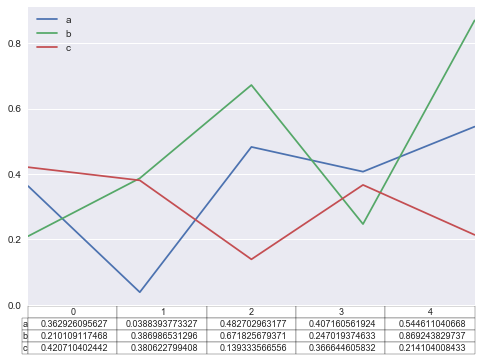

In [60]:
df = pd.DataFrame(np.random.rand(5, 3), columns=['a', 'b', 'c'])

fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks

df.plot(table=True, ax=ax)

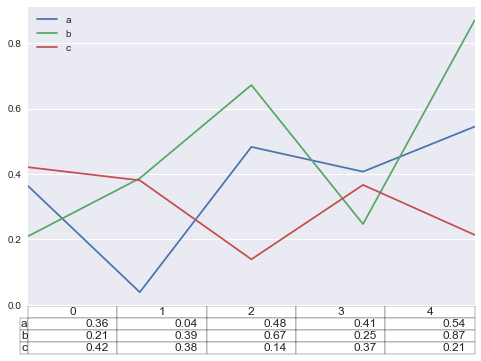

In [61]:
fig, ax = plt.subplots(1, 1)
ax.get_xaxis().set_visible(False)   # Hide Ticks

# 把不同的 DataFrame, Series 传给 table
# 传入的数据使用 print 方法，必须手动转置（transpose）
df.plot(table=np.round(df.T, 2), ax=ax)

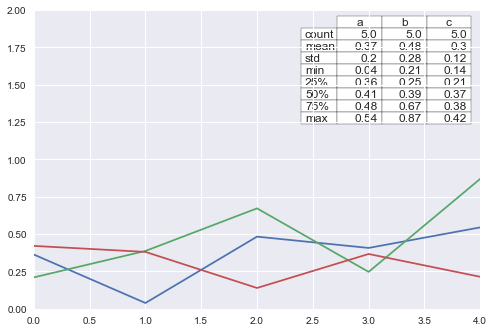

In [62]:
from pandas.tools.plotting import table

fig, ax = plt.subplots(1, 1)

table(ax, np.round(df.describe(), 2), loc='upper right', colWidths=[0.1, 0.1, 0.1])
df.plot(ax=ax, ylim=(0, 2), legend=None)

### 颜色对应

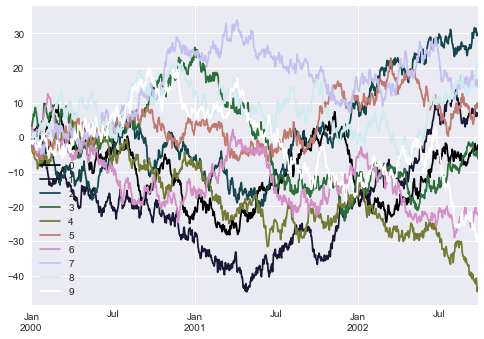

In [63]:
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)

df = df.cumsum()
plt.figure()

# 使用更容易区别的颜色
df.plot(colormap='cubehelix')

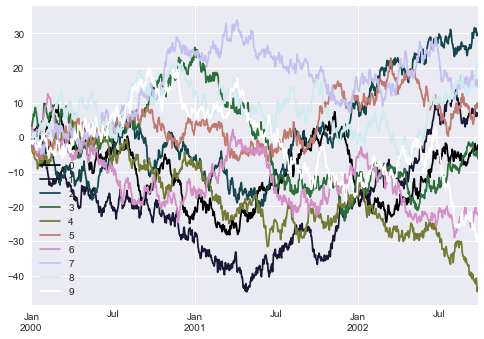

In [64]:
from matplotlib import cm

plt.figure()
df.plot(colormap=cm.cubehelix)

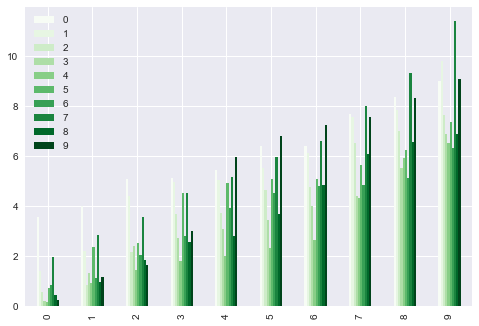

In [65]:
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()

plt.figure()
# 在其他图形上使用 colormap
dd.plot.bar(colormap='Greens')

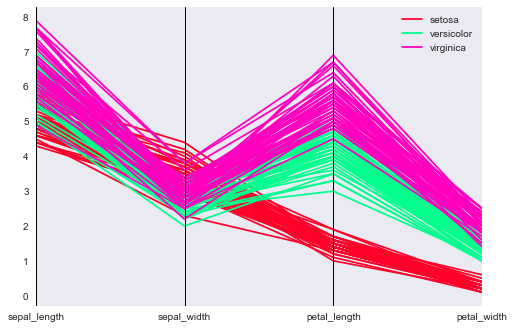

In [66]:
_ = parallel_coordinates(iris, 'species', colormap='gist_rainbow')

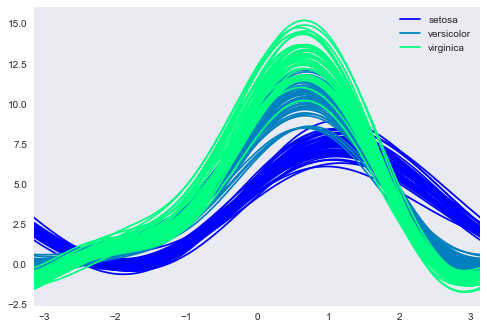

In [67]:
_ = andrews_curves(iris, 'species', colormap='winter')

## 直接使用 matplotlib 绘图

- 当 Pandas 不支援某些图形，可以直接使用 matplotlib 绘图。
- Series, DataFrame 可以传递给 matplotlib 不需额外转换

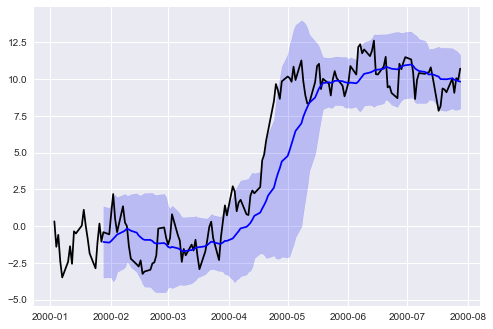

In [68]:
price = pd.Series(np.random.randn(150).cumsum(),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'))

ma = price.rolling(20).mean()
mstd = price.rolling(20).std()

plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)